In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/cv_project_fall_2022')

## Downloading pre trained model

In [3]:
# import os
# import argparse
# import zipfile
# from torch.hub import download_url_to_file

# PRETRAINED_MODELS_PATH = r'https://www.dropbox.com/s/fb39gscd1b42px1/pretrained_models.zip?dl=1'
# remote_resource_path = PRETRAINED_MODELS_PATH
# resource_tmp_path = '/content/drive/MyDrive/cv_project_fall_2022/models' + '.zip'
# download_url_to_file(remote_resource_path, resource_tmp_path)

# print(f'Started unzipping...')
# with zipfile.ZipFile(resource_tmp_path) as zf:
#     local_resource_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'models', 'binaries')
#     os.makedirs(local_resource_path, exist_ok=True)
#     zf.extractall(path=local_resource_path)
# print(f'Unzipping to: {local_resource_path} finished.')

In [4]:


import os
import torch
from torch.utils.data import DataLoader


import utils.utils as utils
from models.definitions.transformer_net import TransformerNet

import matplotlib.pyplot as plt
from PIL import Image

In [5]:
def stylize_static_image(inference_config):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Prepare the model - load the weights and put the model into evaluation mode
    stylization_model = TransformerNet().to(device)
    #model_saved_path = "/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/edtaonisl/ckpt_style_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_0_batch_2499.pth"
    training_state = torch.load(os.path.join(inference_config["model_binaries_path"], inference_config["model_name"]))
    #training_state = torch.load(model_saved_path)
    state_dict = training_state["state_dict"]
    stylization_model.load_state_dict(state_dict, strict=True)
    stylization_model.eval()

    if inference_config['verbose']:
        utils.print_model_metadata(training_state)

    content_img_path = inference_config['content_images_path'] 
    print(content_img_path)
    content_image_to_show = Image.open(content_img_path)
    plt.imshow(content_image_to_show)
    plt.show()

    style_image_path = inference_config['style_images_path']
    style_image_to_show = Image.open(style_image_path)
    plt.imshow(style_image_to_show)
    plt.show()

    with torch.no_grad():
        if os.path.isdir(inference_config['content_input']):  # do a batch stylization (every image in the directory)
            img_dataset = utils.SimpleDataset(inference_config['content_input'], inference_config['img_width'])
            img_loader = DataLoader(img_dataset, batch_size=inference_config['batch_size'])

            try:
                processed_imgs_cnt = 0
                for batch_id, img_batch in enumerate(img_loader):
                    processed_imgs_cnt += len(img_batch)
                    if inference_config['verbose']:
                        print(f'Processing batch {batch_id + 1} ({processed_imgs_cnt}/{len(img_dataset)} processed images).')

                    img_batch = img_batch.to(device)
                    stylized_imgs = stylization_model(img_batch).to('cpu').numpy()
                    for stylized_img in stylized_imgs:
                        utils.save_and_maybe_display_image(inference_config, stylized_img, should_display=False)
            except Exception as e:
                print(e)
                print(f'Consider making the batch_size (current = {inference_config["batch_size"]} images) or img_width (current = {inference_config["img_width"]} px) smaller')
                exit(1)

        else:  # do stylization for a single image
            #content_img_path = os.path.join(inference_config['content_images_path'], inference_config['content_input'])
            content_image = utils.prepare_img(content_img_path, inference_config['img_width'], device)
            stylized_img = stylization_model(content_image).to('cpu').numpy()[0]
            
            
            
            utils.save_and_maybe_display_image(inference_config, stylized_img, should_display=inference_config['should_not_display'])


Model training metadata:
commit_hash : 9e3acca4bb82f2a3a197298c96c37a3dab8e685c
content_weight : 1.0
style_weight : 900000.0
tv_weight : 0
num_of_datapoints : 33000
/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_467.jpg


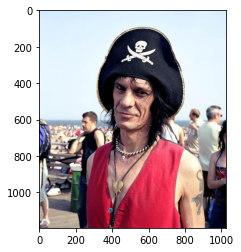

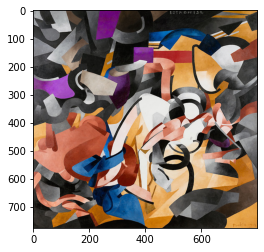

Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


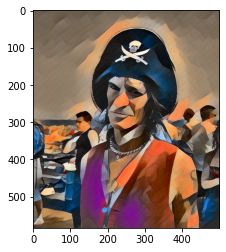

Model training metadata:
commit_hash : 9e3acca4bb82f2a3a197298c96c37a3dab8e685c
content_weight : 1.0
style_weight : 900000.0
tv_weight : 0
num_of_datapoints : 33000
/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_marchingband_1_1031.jpg


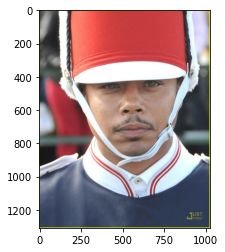

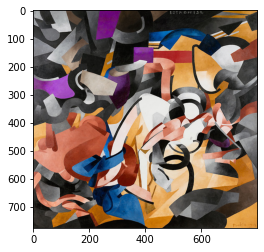

Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


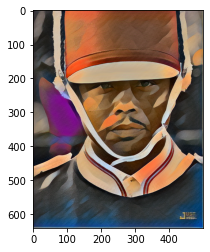

Model training metadata:
commit_hash : 9e3acca4bb82f2a3a197298c96c37a3dab8e685c
content_weight : 1.0
style_weight : 900000.0
tv_weight : 0
num_of_datapoints : 33000
/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_904.jpg


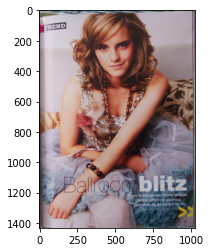

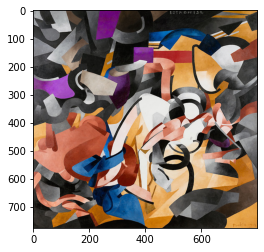

Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


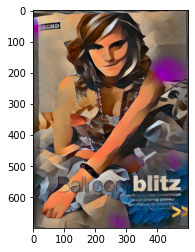

Model training metadata:
commit_hash : 9e3acca4bb82f2a3a197298c96c37a3dab8e685c
content_weight : 1.0
style_weight : 900000.0
tv_weight : 0
num_of_datapoints : 33000
/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/8_Election_Campain_Election_Campaign_8_36.jpg


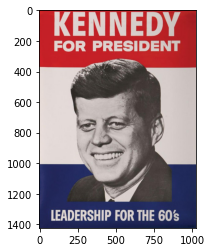

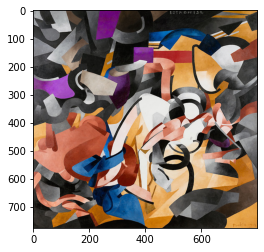

Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


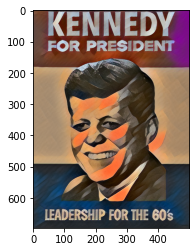

Model training metadata:
commit_hash : 9e3acca4bb82f2a3a197298c96c37a3dab8e685c
content_weight : 1.0
style_weight : 900000.0
tv_weight : 0
num_of_datapoints : 33000
/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/8_Election_Campain_Election_Campaign_8_138.jpg


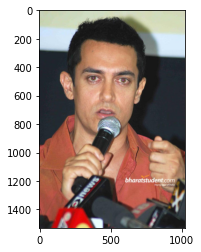

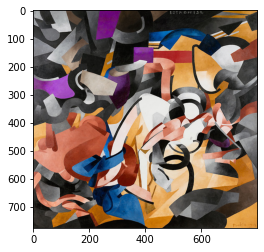

Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


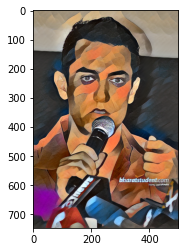

Model training metadata:
commit_hash : 9e3acca4bb82f2a3a197298c96c37a3dab8e685c
content_weight : 1.0
style_weight : 900000.0
tv_weight : 0
num_of_datapoints : 33000
/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/19_Couple_Couple_19_940.jpg


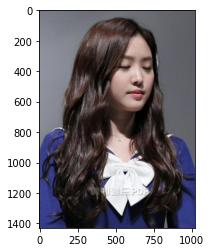

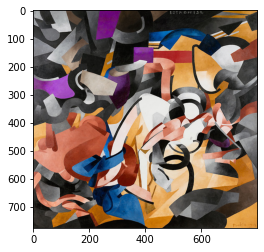

Saved image to /content/drive/MyDrive/cv_project_fall_2022/data/output-images.


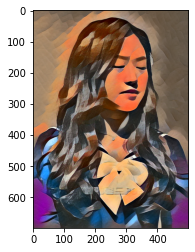

In [7]:
content_images_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'data', 'content-images')
output_images_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'data', 'output-images')
model_binaries_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'models', 'binaries')

assert utils.dir_contains_only_models(model_binaries_path), f'Model directory should contain only model binaries.'
os.makedirs(output_images_path, exist_ok=True)

#
# Modifiable args - feel free to play with these
#
# parser = argparse.ArgumentParser()
# # Put image name or directory containing images (if you'd like to do a batch stylization on all those images)
# parser.add_argument("--content_input", type=str, help="Content image(s) to stylize", default='taj_mahal.jpg')
# parser.add_argument("--batch_size", type=int, help="Batch size used only if you set content_input to a directory", default=5)
# parser.add_argument("--img_width", type=int, help="Resize content image to this width", default=500)
# parser.add_argument("--model_name", type=str, help="Model binary to use for stylization", default='mosaic_4e5_e2.pth')

# # Less frequently used arguments
# parser.add_argument("--should_not_display", action='store_false', help="Should display the stylized result")
# parser.add_argument("--verbose", action='store_true', help="Print model metadata (how the model was trained) and where the resulting stylized image was saved")
# parser.add_argument("--redirected_output", type=str, help="Overwrite default output dir. Useful when this project is used as a submodule", default=None)
# args = parser.parse_args()

# # if redirected output is not set when doing batch stylization set to default image output location
# if os.path.isdir(args.content_input) and args.redirected_output is None:
#     args.redirected_output = output_images_path

# Wrapping inference configuration into a dictionary
inference_config = dict()


inference_config['content_input'] = 'lion.jpg'
inference_config['batch_size'] = 5
inference_config['img_width'] = 500

inference_config['model_name'] = 'edtaonisl_9e5_33k.pth'
inference_config['style_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/data/style-images/edtaonisl.jpg'
    
inference_config['should_not_display'] = True
inference_config['verbose'] = True
# inference_config['redirected_output'] = True

#inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/data/widerface/WIDER_train/images/0--Parade/0_Parade_marchingband_1_641.jpg'
inference_config['output_images_path'] = output_images_path
inference_config['model_binaries_path'] = model_binaries_path
inference_config['redirected_output'] = output_images_path


inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_467.jpg'
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_marchingband_1_1031.jpg'
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_904.jpg'
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/8_Election_Campain_Election_Campaign_8_36.jpg'
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/8_Election_Campain_Election_Campaign_8_138.jpg'
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/19_Couple_Couple_19_940.jpg'
stylize_static_image(inference_config)



In [7]:
# import face_mask

In [8]:
# https://github.com/onnx/models#body_analysis

In [ ]:
# https://www.analyticsvidhya.com/blog/2018/07/top-10-pretrained-models-get-started-deep-learning-part-1-computer-vision/

In [ ]:
# https://modelzoo.co/

In [ ]:
# https://github.com/topics/face-segmentation